# Merge

**Merge** works by combining datframes on columns

**Merging** two datasets is the process of bringing two datasets together into one, and aligning the rows from each based on common attributes or columns.


**Merge and Join** are used relatively interchangeably in Pandas and other languages. Despite the fact that Pandas has both “merge” and “join” functions, essentially they both do the similar things.

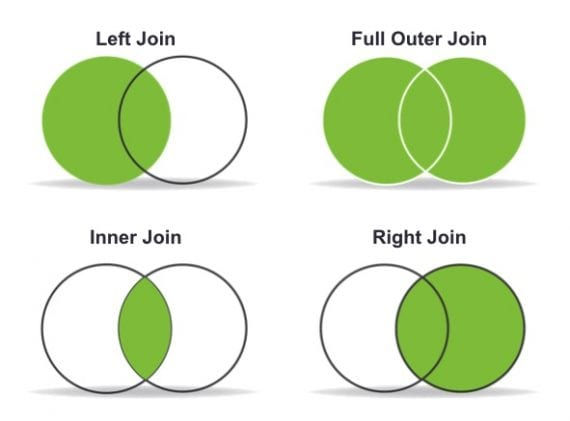

#### **pd.merge(left_dataframe, right_dataframe, on="some_column", how="left|right|inner|outer)**

**LEFT**  dataframe is whichever one you type first.

**RIGHT** dataframe is whichever one you type second.

**on**    is the column or list of columns that determine which rows from one table match to which rows in the second table. 
Sometimes the columns you want to merge on have different names in the dataframes. 

**For example** maybe one dataframe calls it RecordID while the other dataframe calls it RowID 
even though they are really the same ID. In those cases you can specify the column names separately for each dataframe using the **left_on** and **right_on** arguments.

**how** is the method to use, by default Pandas uses the "inner" method.

In [1]:
import pandas as pd

In [5]:
right_1 = pd.DataFrame({'ID':[3,4,5,6], 'right_side': 'RIGHT'})
right_1

,ID,right_side
0,3,RIGHT
1,4,RIGHT
2,5,RIGHT
3,6,RIGHT


In [8]:
left_1 = pd.DataFrame({'ID':[1,2,3,4], 'left_side': 'LEFT'})
left_1

,ID,left_side
0,1,LEFT
1,2,LEFT
2,3,LEFT
3,4,LEFT


# Left Merge

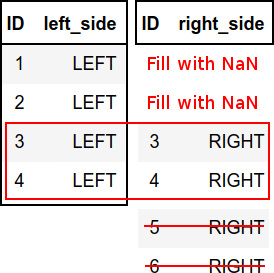

In [3]:
pd.merge(left = left_1, right = right_1, on = "ID", how="left")


,ID,left_side,right_side
0,1,LEFT,NaN
1,2,LEFT,NaN
2,3,LEFT,RIGHT
3,4,LEFT,RIGHT


# Right Merge

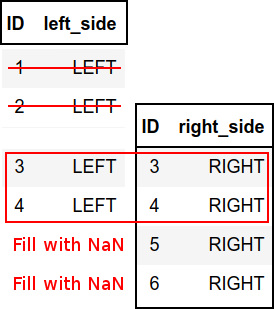

In [4]:
pd.merge(left=left_1, right=right_1, on="ID", how="right")


,ID,left_side,right_side
0,3,LEFT,RIGHT
1,4,LEFT,RIGHT
2,5,NaN,RIGHT
3,6,NaN,RIGHT



## Outer Merge


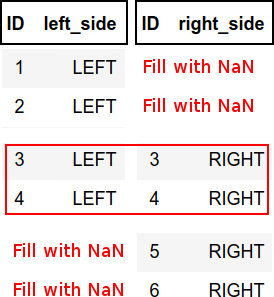

In [5]:
pd.merge(left=left_1, right=right_1, on="ID", how="outer") 

,ID,left_side,right_side
0,1,LEFT,NaN
1,2,LEFT,NaN
2,3,LEFT,RIGHT
3,4,LEFT,RIGHT
4,5,NaN,RIGHT
5,6,NaN,RIGHT


## Inner Merge

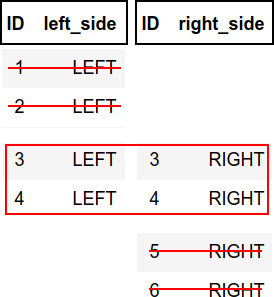

In [6]:
pd.merge(left=left_1 , right=right_1, on="ID", how="inner")

,ID,left_side,right_side
0,3,LEFT,RIGHT
1,4,LEFT,RIGHT


In [2]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})

df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

df3 = pd.DataFrame({'hire_date': [2004, 2008, 2012, 2014],
                   'salary': [12,23,43,87]})

display(df1, df2,df3)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


,hire_date,salary
0,2004,12
1,2008,23
2,2012,43
3,2014,87


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   employee   4 non-null      object
 1   hire_date  4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [10]:
type(df2)

pandas.core.frame.DataFrame

In [11]:
pd.merge(df1,df2, on='employee', how="inner") # intersection

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [13]:
pd.merge(df1,df2, on='employee', how="left")

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [14]:
df = pd.merge(df1,df2, on='employee', how="right")
df

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [11]:
dff = df2.merge(df3, on = 'hire_date', how = 'inner')
dff = dff.merge(df1, on = 'employee', how = 'inner')
dff

,employee,hire_date,salary,group
0,Lisa,2004,12,Engineering
1,Bob,2008,23,Accounting
2,Jake,2012,43,Engineering
3,Sue,2014,87,HR


In [12]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [13]:
display(df1, df2)
# df_4_1 = pd.merge(pd.merge(df1,df2, on='employee'),df4, on = 'group')
df_4_1 = dff.merge(df4, on ='group', how = 'inner')
df_4_1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


,employee,hire_date,salary,group,supervisor
0,Lisa,2004,12,Engineering,Guido
1,Jake,2012,43,Engineering,Guido
2,Bob,2008,23,Accounting,Carly
3,Sue,2014,87,HR,Steve


In [14]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering',
                              'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 
                               'coding', 'linux',
                               'spreadsheets', 'organization']})


# display(df4, df5)

pd.merge(df_4_1,df5, on = 'group')

,employee,hire_date,salary,group,supervisor,skills
0,Lisa,2004,12,Engineering,Guido,coding
1,Lisa,2004,12,Engineering,Guido,linux
2,Jake,2012,43,Engineering,Guido,coding
3,Jake,2012,43,Engineering,Guido,linux
4,Bob,2008,23,Accounting,Carly,math
5,Bob,2008,23,Accounting,Carly,spreadsheets
6,Sue,2014,87,HR,Steve,spreadsheets
7,Sue,2014,87,HR,Steve,organization


## When Column names are different in both dataframes

In [15]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [4]:
df1_1 = pd.DataFrame({'name': ['Bob_55', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]}, 
                    )

display(df1,
        df1_1,
        pd.merge(df1_1, df1, left_on="name", 
                 right_on="employee", how = 'outer'))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,name,salary
0,Bob_55,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


,name,salary,employee,group
0,Bob_55,70000.0,NaN,NaN
1,Jake,80000.0,Jake,Engineering
2,Lisa,120000.0,Lisa,Engineering
3,Sue,90000.0,Sue,HR
4,NaN,NaN,Bob,Accounting


The result has a redundant column that we can drop if desired–for example, by using the drop() method of DataFrame

In [18]:
pd.merge(df1, 
         df1_1, 
         left_on="employee",
         right_on="name").drop('name', axis=1)

,employee,group,salary
0,Jake,Engineering,80000
1,Lisa,Engineering,120000
2,Sue,HR,90000


# Overlapping value columns
## The merge suffixes argument takes a tuple of list of strings to append to overlapping column names in the input DataFrames to disambiguate the result columns: -->

In [11]:
# same column names for both df
left_11 = pd.DataFrame({'ID': [2,3,4,5], 'left_side': 'LEFT'})
display(left_1,left_11)

pd.merge(left_1, left_11, on = 'ID', suffixes = ['_leftOne', '_rightOne'], how = 'outer')

,ID,left_side
0,1,LEFT
1,2,LEFT
2,3,LEFT
3,4,LEFT


,ID,left_side
0,2,LEFT
1,3,LEFT
2,4,LEFT
3,5,LEFT


,ID,left_side_leftOne,left_side_rightOne
0,1,LEFT,NaN
1,2,LEFT,LEFT
2,3,LEFT,LEFT
3,4,LEFT,LEFT
4,5,NaN,LEFT


# Concatenation - on rows n cols

In [5]:
left_1

,ID,left_side
0,1,LEFT
1,2,LEFT
2,3,LEFT
3,4,LEFT


In [6]:
right_1

,ID,right_side
0,3,RIGHT
1,4,RIGHT
2,5,RIGHT
3,6,RIGHT


In [7]:
l9 = left_1.copy()

# Default OUTER Join in Concat

display('Row Wise Concat ',
        pd.concat( [left_1, right_1], 0))  # 0- default


display( 'Column wise Concat ',
       pd.concat( [left_1, right_1], 1, 'inner'))


'Row Wise Concat '

,ID,left_side,right_side
0,1,LEFT,NaN
1,2,LEFT,NaN
2,3,LEFT,NaN
3,4,LEFT,NaN
0,3,NaN,RIGHT
1,4,NaN,RIGHT
2,5,NaN,RIGHT
3,6,NaN,RIGHT


'Column wise Concat '

,ID,left_side,ID,right_side
0,1,LEFT,3,RIGHT
1,2,LEFT,4,RIGHT
2,3,LEFT,5,RIGHT
3,4,LEFT,6,RIGHT


# Append

In [24]:
result = df1.append([df2, df3], ignore_index = True)
result

,employee,group,hire_date,salary
0,Bob,Accounting,NaN,NaN
1,Jake,Engineering,NaN,NaN
2,Lisa,Engineering,NaN,NaN
3,Sue,HR,NaN,NaN
4,Lisa,NaN,2004.0,NaN
5,Bob,NaN,2008.0,NaN
6,Jake,NaN,2012.0,NaN
7,Sue,NaN,2014.0,NaN
8,NaN,NaN,2004.0,12.0
9,NaN,NaN,2008.0,23.0


# Join 
**The join method works best when we are joining dataframes on their indexes** 

In [12]:
df1 = pd.DataFrame({'employee': [ 'Jake', 'Lisa','Bob', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
display(df1, df2)

,employee,group
0,Jake,Accounting
1,Lisa,Engineering
2,Bob,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


# Column names same in -- Join

In [36]:
df1.join(df2, lsuffix = '_df1', rsuffix = '_df2')

,employee_df1,group,employee_df2,hire_date
0,Jake,Accounting,Lisa,2004
1,Lisa,Engineering,Bob,2008
2,Bob,Engineering,Jake,2012
3,Sue,HR,Sue,2014


In [10]:
left_1.join(df1) # no common column 

,ID,left_side,employee,group
0,1,LEFT,Bob,Accounting
1,2,LEFT,Jake,Engineering
2,3,LEFT,Lisa,Engineering
3,4,LEFT,Sue,HR


# Concatenate

In [39]:
new = pd.concat([df1, df2, df3], keys = ['x','y','z'])
new

employee        group  hire_date  salary
x 0     Jake   Accounting        NaN     NaN
  1     Lisa  Engineering        NaN     NaN
  2      Bob  Engineering        NaN     NaN
  3      Sue           HR        NaN     NaN
y 0     Lisa          NaN     2004.0     NaN
  1      Bob          NaN     2008.0     NaN
  2     Jake          NaN     2012.0     NaN
  3      Sue          NaN     2014.0     NaN
z 0      NaN          NaN     2004.0    12.0
  1      NaN          NaN     2008.0    23.0
  2      NaN          NaN     2012.0    43.0
  3      NaN          NaN     2014.0    87.0

In [27]:
new.loc['x']

,employee,group,hire_date,salary
0,Bob,Accounting,NaN,NaN
1,Jake,Engineering,NaN,NaN
2,Lisa,Engineering,NaN,NaN
3,Sue,HR,NaN,NaN


In [29]:
new.loc['y']

,employee,group,hire_date,salary
0,Lisa,NaN,2004.0,NaN
1,Bob,NaN,2008.0,NaN
2,Jake,NaN,2012.0,NaN
3,Sue,NaN,2014.0,NaN


In [19]:
pd.concat([df1, df1_1])

,employee,group,name,salary
0,Bob,Accounting,NaN,NaN
1,Jake,Engineering,NaN,NaN
2,Lisa,Engineering,NaN,NaN
3,Sue,HR,NaN,NaN
0,NaN,NaN,Bob_55,70000.0
1,NaN,NaN,Jake,80000.0
2,NaN,NaN,Lisa,120000.0
3,NaN,NaN,Sue,90000.0


In [17]:
pd.concat([df1, df2])

,employee,group,hire_date
0,Bob,Accounting,NaN
1,Jake,Engineering,NaN
2,Lisa,Engineering,NaN
3,Sue,HR,NaN
0,Lisa,NaN,2004.0
1,Bob,NaN,2008.0
2,Jake,NaN,2012.0
3,Sue,NaN,2014.0


In [13]:
display(df1, df1_1)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,name,salary
0,Bob_55,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


In [41]:
display(df1.join(df1_1))

display(pd.concat([df1, df1_1], join = 'outer'))

display(pd.merge(df1, df1_1, left_on='employee',right_on = 'name'))

,employee,group,name,salary
0,Jake,Accounting,Bob_55,70000
1,Lisa,Engineering,Jake,80000
2,Bob,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


,employee,group,name,salary
0,Jake,Accounting,NaN,NaN
1,Lisa,Engineering,NaN,NaN
2,Bob,Engineering,NaN,NaN
3,Sue,HR,NaN,NaN
0,NaN,NaN,Bob_55,70000.0
1,NaN,NaN,Jake,80000.0
2,NaN,NaN,Lisa,120000.0
3,NaN,NaN,Sue,90000.0


,employee,group,name,salary
0,Jake,Accounting,Jake,80000
1,Lisa,Engineering,Lisa,120000
2,Sue,HR,Sue,90000


In [89]:
df1_2 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]}, 
                    index = [10,11,12,13])


In [90]:
display(df1.join(df1_2),
        pd.concat([df1,df1_2]))

,employee,group,name,salary
0,Jake,Accounting,NaN,NaN
1,Lisa,Engineering,NaN,NaN
2,Bob,Engineering,NaN,NaN
3,Sue,HR,NaN,NaN


,employee,group,name,salary
0,Jake,Accounting,NaN,NaN
1,Lisa,Engineering,NaN,NaN
2,Bob,Engineering,NaN,NaN
3,Sue,HR,NaN,NaN
10,NaN,NaN,Bob,70000.0
11,NaN,NaN,Jake,80000.0
12,NaN,NaN,Lisa,120000.0
13,NaN,NaN,Sue,90000.0


In [91]:
display(df1, df1_2,
        pd.concat([df1, df1_2]).fillna('*****'))

,employee,group
0,Jake,Accounting
1,Lisa,Engineering
2,Bob,Engineering
3,Sue,HR


,name,salary
10,Bob,70000
11,Jake,80000
12,Lisa,120000
13,Sue,90000


,employee,group,name,salary
0,Jake,Accounting,*****,*****
1,Lisa,Engineering,*****,*****
2,Bob,Engineering,*****,*****
3,Sue,HR,*****,*****
10,*****,*****,Bob,70000
11,*****,*****,Jake,80000
12,*****,*****,Lisa,120000
13,*****,*****,Sue,90000


In [2]:
def a(nums):
    for num in nums:
        if num % 7 ==0:
            return True
        else:
            return False
a([2,3,4,2,7])        

False

In [6]:
def s(n, t):
    new = []
    for i in n:
        new.append(i > t)
    return new    
#     return[i > t for i in n]
s([1,2,3,4], 2)

[False, False, True, True]

In [7]:
print('hello how\'s you')

hello how's you


In [9]:
print("hey! it\'s my \"new laptop\"")

hey! it's my "new laptop"


In [12]:
print("that\'s a huge mountain:/\\")

that's a huge mountain:/\


In [20]:
k = ""
len(k)
kk = bool(k)
type(kk)
kk is False
k is True

False

# MultiIndex

In [41]:
array  =[[1,2,3,4], ['red', 'blue', 'green', 'pink']]
pd.MultiIndex.from_arrays(array, names = ('number', 'color'))

MultiIndex([(1,   'red'),
            (2,  'blue'),
            (3, 'green'),
            (4,  'pink')],
           names=['number', 'color'])